<a href="https://colab.research.google.com/github/jorgegzz1609-collab/AI_IB/blob/main/Assignments/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4.- Supervised learning model: Decision tree

Authors:
* Jorge Alberto González Garza    - 2043501 - N4
* Julie Alejandra López Reyna     - 1999159 - N4
* Andrea Chavarría Hernández      - 1993735 - N4
* Juan Alejandro González Gómez   - 2047928 - N4
* Norma Cecilia Cázares del Angel - 2049215 - N4
* Roberto Aldahir Arreola Moreno  - 2048190 - N4



# 1. Load libraries

In [1]:
# Loading of libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


# 2. Load data

In [2]:
# Loading of data set
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Exploration
print('amount of images in training, x, y')
print(train_images.shape, '\n')
print('amount of labels in training')
print(len(train_labels), '\n')
print('training labels')
print(train_labels,'\n')
print('amount of images in testing, x, y')
print(test_images.shape, '\n')
print('amount of labels in testing')
print(len(test_labels), '\n')

amount of images in training, x, y
(60000, 28, 28) 

amount of labels in training
60000 

training labels
[5 0 4 ... 5 6 8] 

amount of images in testing, x, y
(10000, 28, 28) 

amount of labels in testing
10000 



# 3. Data preprocessing

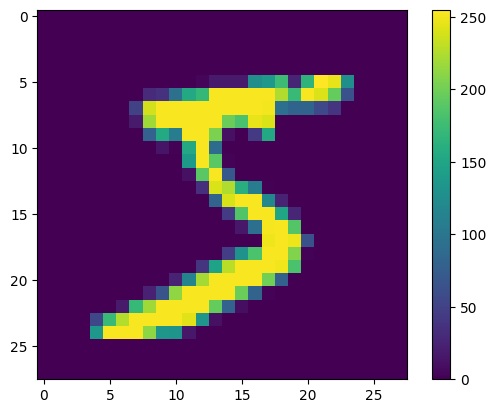

In [3]:
# Looking if images are appropriate for the network (0 - 1)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

* Note: Here we can see that the pixels have values between 0 and 255, which can hinder the optimal learning of the network. That's why we will scale these values in a range of 0 to 1.

In [4]:
# Scaling of pixels' values
train_images = train_images / 255.0
test_images = test_images / 255.0

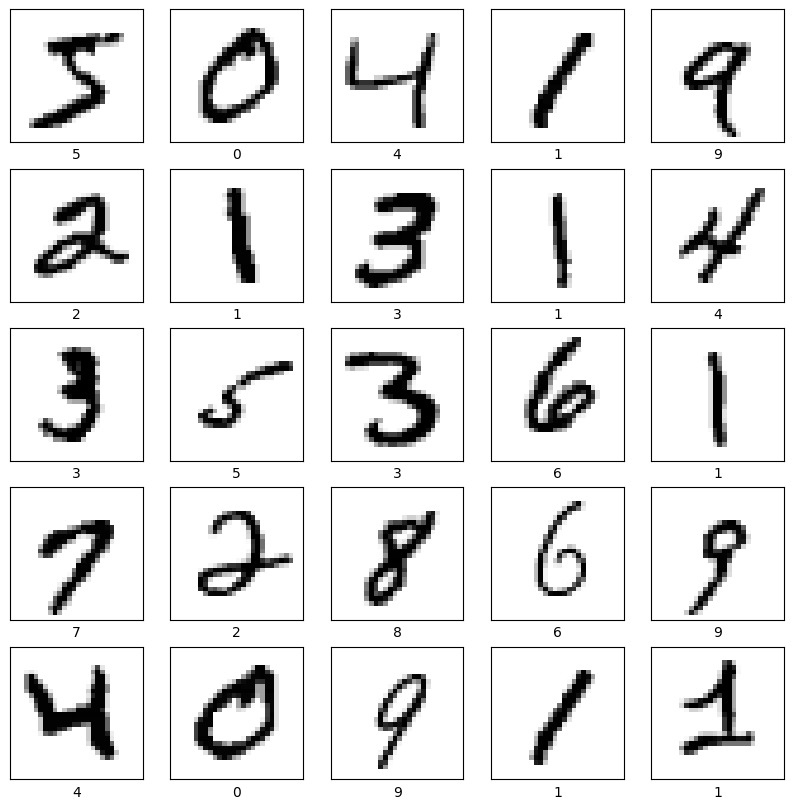

In [5]:
# Training data set's format verification (First 25 images with respective labels)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

* Note: Approved.

# 4. Model selection and training

In [6]:
# Layers configuration
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
model.fit(train_images, train_labels, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8776 - loss: 0.4290
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9638 - loss: 0.1206
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0772
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9823 - loss: 0.0583
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0440
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9902 - loss: 0.0325
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9933 - loss: 0.0239
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9939 - loss: 0.0200
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9955 - loss: 0.0165
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9970 - loss: 0.0114


# 5. Model testing

In [7]:
# Evaluating accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 2ms/step - accuracy: 0.9756 - loss: 0.0850

Test accuracy: 0.975600004196167


In [8]:
# Predictions
predictions = model.predict(test_images)
  # 1st prediction
print('1st prediction')
print(predictions[0], '\n')
print('Prediction')
print(np.argmax(predictions[0]), '\n')
print('Real label')
print(test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1st prediction
[6.8570585e-09 1.2051424e-11 2.0414189e-05 1.6853452e-04 1.9174744e-14
 9.1286867e-11 1.8102924e-15 9.9981093e-01 2.6876981e-08 2.0200324e-07] 

Prediction
7 

Real label
7


* Note: Here we can see how the model predicts the label for the image 0. It shows the array where the place of label "7" has the highest trust value. That's why the model prints the number seven in the prediction, and we can see that the real label is seven. So, it works well.

In [9]:
# Graphing predictions and trust values function

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

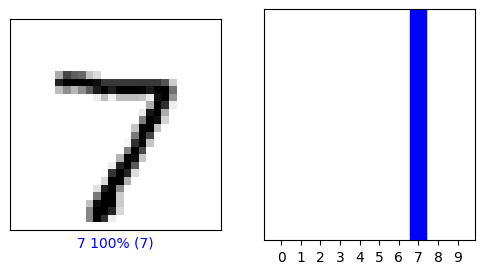

In [10]:
# Graphing one image with its predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

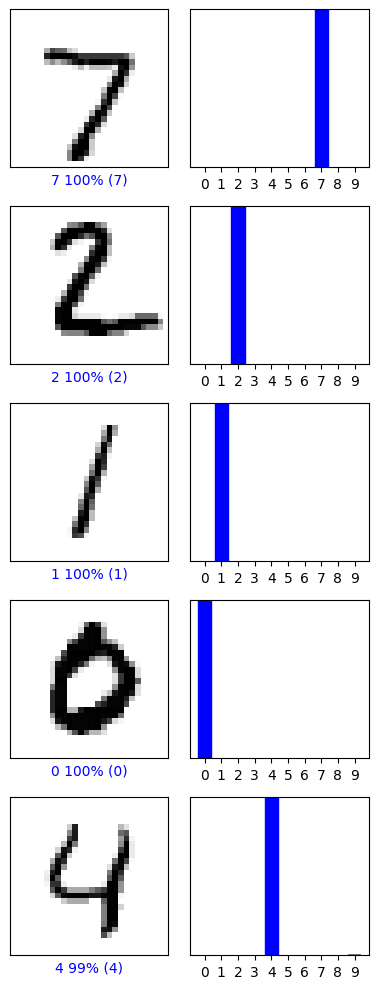

In [11]:
# 5 predictions with its graph
num_rows = 5
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()